In [1]:
import pickle
from sklearn import preprocessing
from nltk import word_tokenize
import string
import csv 
from sklearn.model_selection import KFold
from sklearn import svm
import pickle
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix, confusion_matrix, f1_score, ConfusionMatrixDisplay
#from imblearn.over_sampling import SMOTENC, SMOTEN, RandomOverSampler
from collections import Counter
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle

In [2]:
data = pickle.load(open("data_5splits.pkl", "rb"))

In [3]:
split_2 = data[2]

In [4]:
X_train = split_2[0][0]
y_train = split_2[0][1]

X_test = split_2[1][0]
y_test = split_2[1][1]

In [5]:
le = pickle.load(open("label_encoder.pkl", "rb"))

In [6]:
svm_model = pickle.load(open("../Models/svm_models.pkl", "rb"))[2]

In [ ]:
rf_model = pickle.load(open("../Models/rf_models.pkl", "rb"))[2]

## SVM confusion Matrix


In [35]:
predictions = svm_model.predict(X_test)

In [36]:
predictions 

array([ 6,  9,  4,  9,  9,  9, 11,  9,  9, 11,  9,  9,  9,  9,  9,  6,  8,
        9,  0,  1,  9,  9,  9,  9,  8,  9,  4,  9,  9,  9,  9,  9, 11,  9,
       10,  6,  9,  9,  1,  9,  9,  9,  9,  9,  8,  5,  9,  9,  9,  8,  8,
        4,  9,  1,  1,  1,  1,  1,  6,  9,  9,  9,  9,  9,  9,  9,  9,  9,
       12,  9,  9,  4,  9,  9,  9,  9,  9,  9,  9,  9, 11,  9,  9,  9,  9,
        9,  6,  9,  9,  6,  9,  9,  9, 11,  9,  6,  9, 10,  9,  9,  9,  6,
        9,  8,  9,  1, 11,  9,  9,  9,  9,  9,  9,  8,  1,  9,  1,  9,  9,
        9,  9, 10,  9,  9,  3,  3,  9,  3,  3,  9,  3,  3,  3,  3,  5,  4,
        2,  4,  4,  4,  2,  5,  2,  2,  4,  9,  4,  5,  2,  9,  2,  2,  2,
        9,  5,  4,  2,  5,  5,  4,  4,  5,  5,  4,  2])

In [40]:
print(classification_report(le.inverse_transform(y_test), le.inverse_transform(predictions)))

              precision    recall  f1-score   support

         ack       1.00      1.00      1.00         1
         dno       1.00      0.71      0.83        14
          fa       1.00      0.83      0.91        12
          fe       1.00      0.73      0.84        11
          fp       0.79      0.85      0.81        13
          ft       0.89      1.00      0.94         8
           n       1.00      0.89      0.94         9
         n-d       0.00      0.00      0.00         1
       query       0.86      0.86      0.86         7
         sno       0.80      0.96      0.87        73
          so       0.67      0.50      0.57         4
           y       1.00      0.60      0.75        10
         y-d       0.00      0.00      0.00         2

    accuracy                           0.85       165
   macro avg       0.77      0.69      0.72       165
weighted avg       0.85      0.85      0.84       165



c:\users\adianidm\venv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\adianidm\venv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\adianidm\venv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
cm = confusion_matrix(le.inverse_transform(y_test), le.inverse_transform(predictions))

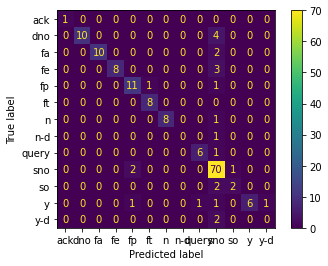

In [42]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot()

## Random Forest Confusion Matrix

In [43]:
predictions_rf = rf_model.predict(X_test)

In [44]:
print(classification_report(le.inverse_transform(y_test), le.inverse_transform(predictions_rf)))

              precision    recall  f1-score   support

         ack       1.00      1.00      1.00         1
         dno       1.00      0.71      0.83        14
          fa       1.00      0.83      0.91        12
          fe       1.00      0.73      0.84        11
          fp       0.89      0.62      0.73        13
          ft       0.88      0.88      0.88         8
           n       1.00      0.78      0.88         9
         n-d       0.00      0.00      0.00         1
       query       0.75      0.86      0.80         7
         sno       0.77      0.99      0.86        73
          so       1.00      0.50      0.67         4
           y       1.00      0.60      0.75        10
         y-d       0.50      0.50      0.50         2

    accuracy                           0.84       165
   macro avg       0.83      0.69      0.74       165
weighted avg       0.86      0.84      0.83       165



c:\users\adianidm\venv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\adianidm\venv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\adianidm\venv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


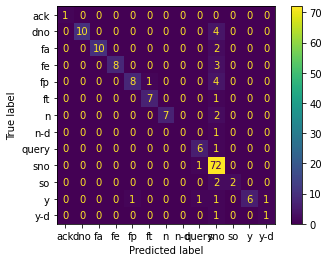

In [45]:
cm = confusion_matrix(le.inverse_transform(y_test), le.inverse_transform(predictions_rf))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot()